In [22]:
import pandas as pd
import numpy as np
from hmmlearn import hmm
from sklearn.preprocessing import StandardScaler

# 读取数据
data = pd.read_csv('00241.csv')

# 获取“收盘”和“成交量”列的列名
close_price_column = data.columns[5]  # 假设'收盘'是第六列
volume_column = data.columns[6]       # 假设'成交量'是第七列

# 计算前一日的收盘价和日收益率
data['Previous_Close'] = data[close_price_column].shift(1)
data['Return'] = (data[close_price_column] - data['Previous_Close']) / data['Previous_Close']
data = data.dropna()

# 标准化特征
scaler = StandardScaler()
X = scaler.fit_transform(data[['Return', volume_column]])

# 定义并训练隐马尔可夫模型（HMM）
n_components = 2  # 可以尝试不同的状态数
model = hmm.GaussianHMM(n_components=n_components, covariance_type="full", n_iter=100)

# 拟合模型
model.fit(X)

# 预测隐藏状态
hidden_states = model.predict(X)

# 将预测的状态添加到数据框中
data['Hidden_State'] = hidden_states

# 基于状态变化创建交易信号
data['Signal'] = data['Hidden_State'].diff()
data['Strategy'] = data['Return'] * data['Signal'].shift(1)

# 计算策略的累计回报
data['Cumulative_Returns'] = (1 + data['Strategy']).cumprod()

# 打印数据框的前几行
print(data.head())

           日期      时间      开盘      最高      最低      收盘      成交量        成交额  \
1  2019/01/02   940.0    6.39    6.39    6.31    6.32    639.0  405740.03   
2  2019/01/02   945.0    6.34    6.35    6.30    6.32    639.0  405060.06   
3  2019/01/02   950.0    6.32    6.32    6.30    6.30    279.0  176480.00   
4  2019/01/02   955.0    6.30    6.34    6.30    6.30   1020.0  643731.38   
5  2019/01/02  1000.0    6.27    6.30    6.25    6.29   1440.0  903880.00   

   Previous_Close    Return  Hidden_State  Signal  Strategy  \
1            6.39 -0.010955             1     NaN       NaN   
2            6.32  0.000000             0    -1.0       NaN   
3            6.32 -0.003165             0     0.0  0.003165   
4            6.30  0.000000             0     0.0  0.000000   
5            6.30 -0.001587             0     0.0 -0.000000   

   Cumulative_Returns  
1                 NaN  
2                 NaN  
3            1.003165  
4            1.003165  
5            1.003165  


D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26469 (\N{CJK UNIFIED IDEOGRAPH-6765}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 28304 (\N{CJK UNIFIED IDEOGRAPH-6E90}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36890 (\N{CJK UNIFIED IDEOGRAPH-901A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\Lib\site-packages\IPython\core\pylabtools.p

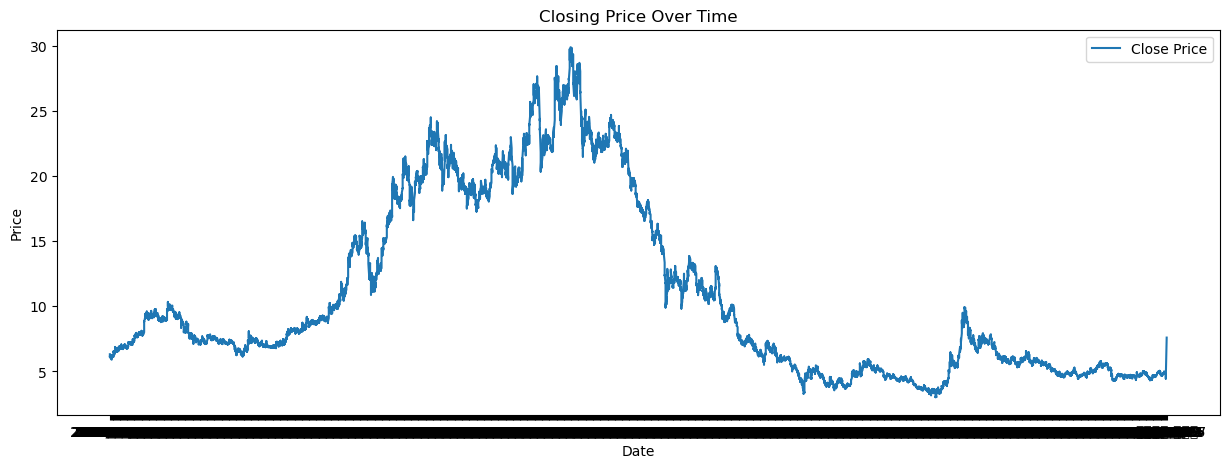

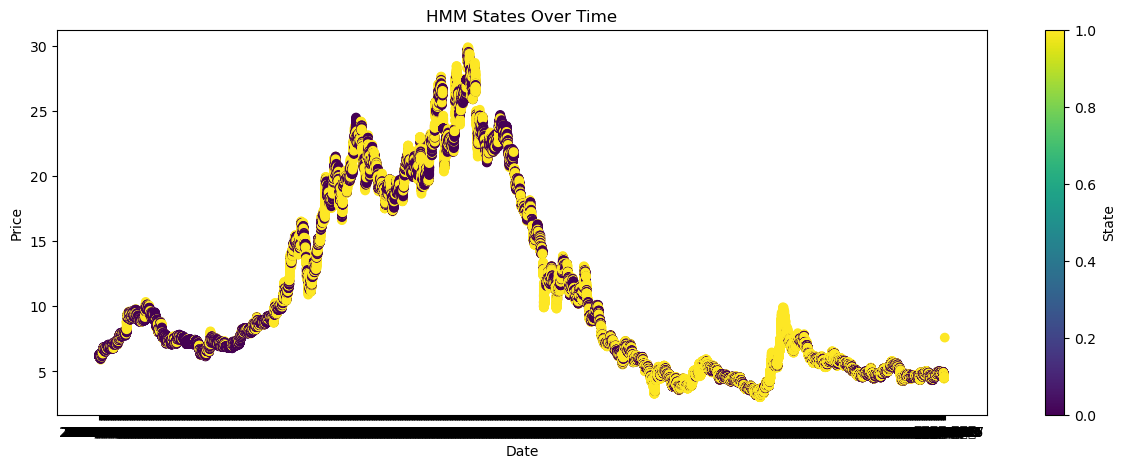

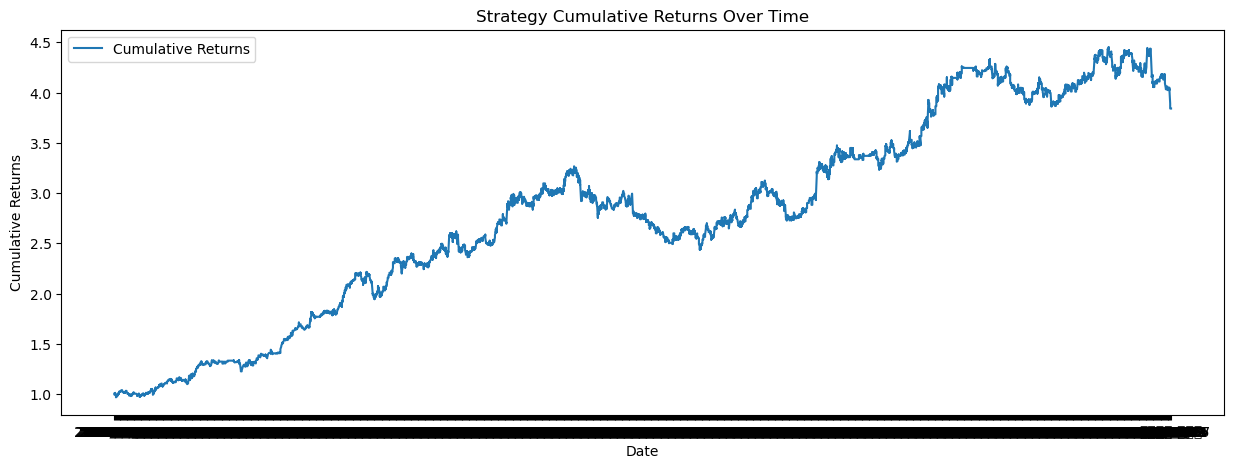

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# 获取日期和收盘价列的列名
date_column = data.columns[0]  # 假设日期是第一列
close_price_column = data.columns[5]  # 假设收盘价是第六列

# 绘制收盘价随时间变化的图
plt.figure(figsize=(15, 5))
plt.plot(data[date_column], data[close_price_column], label='收盘价')
plt.xlabel('日期')
plt.ylabel('价格')
plt.title('随时间变化的收盘价')
plt.legend()
plt.show()

# 绘制隐马尔可夫模型状态随时间变化的图
plt.figure(figsize=(15, 5))
plt.scatter(data[date_column], data[close_price_column], c=data['Hidden_State'], cmap='viridis', label='状态')
plt.xlabel('日期')
plt.ylabel('价格')
plt.title('隐马尔可夫模型状态随时间变化')
plt.colorbar(label='状态')
plt.show()

# 绘制策略累计回报随时间变化的图
plt.figure(figsize=(15, 5))
plt.plot(data[date_column], data['Cumulative_Returns'], label='累计回报')
plt.xlabel('日期')
plt.ylabel('累计回报')
plt.title('策略累计回报随时间变化')
plt.legend()
plt.show()

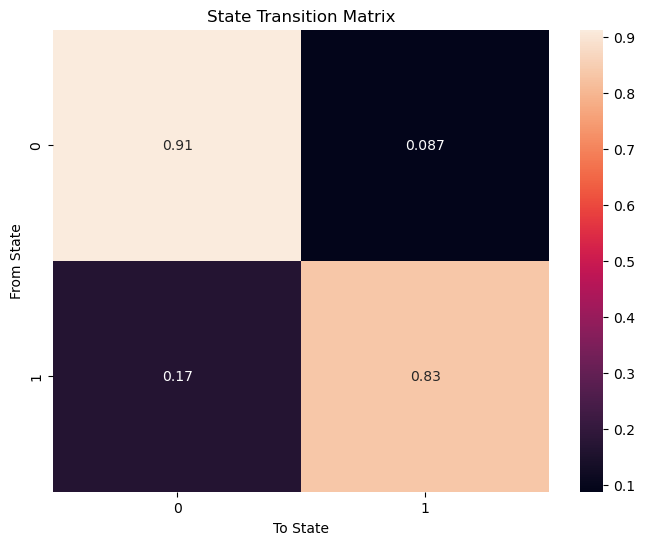

In [25]:
import seaborn as sns

transition_matrix = model.transmat_

plt.figure(figsize=(8, 6))
sns.heatmap(transition_matrix, annot=True)
plt.xlabel('To State')
plt.ylabel('From State')
plt.title('State Transition Matrix')
plt.show()


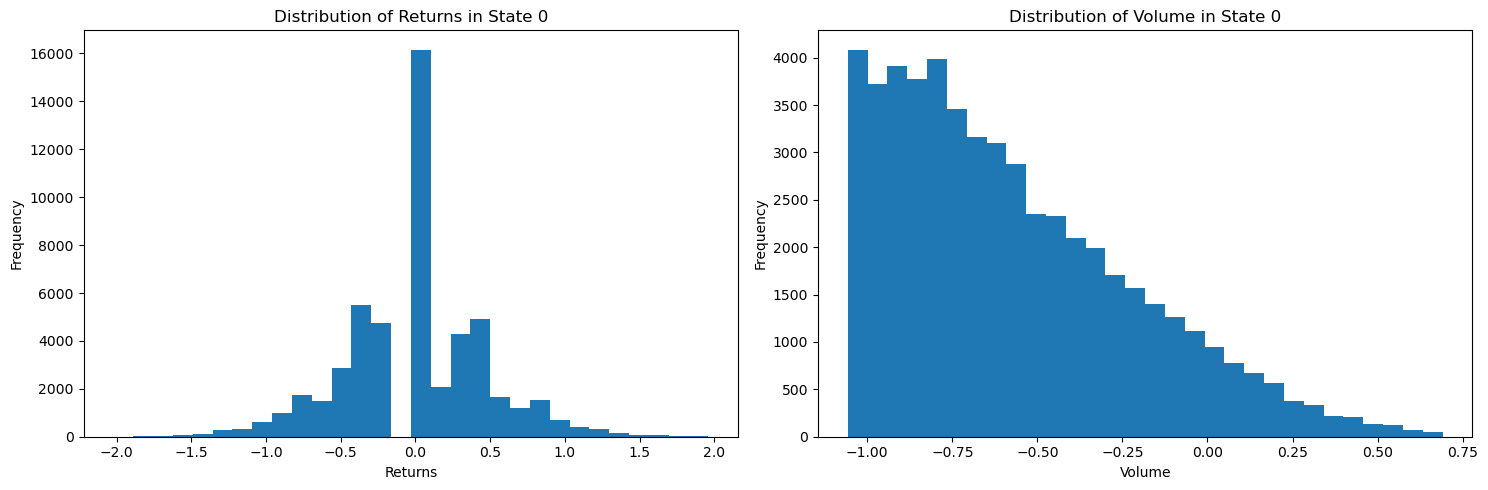

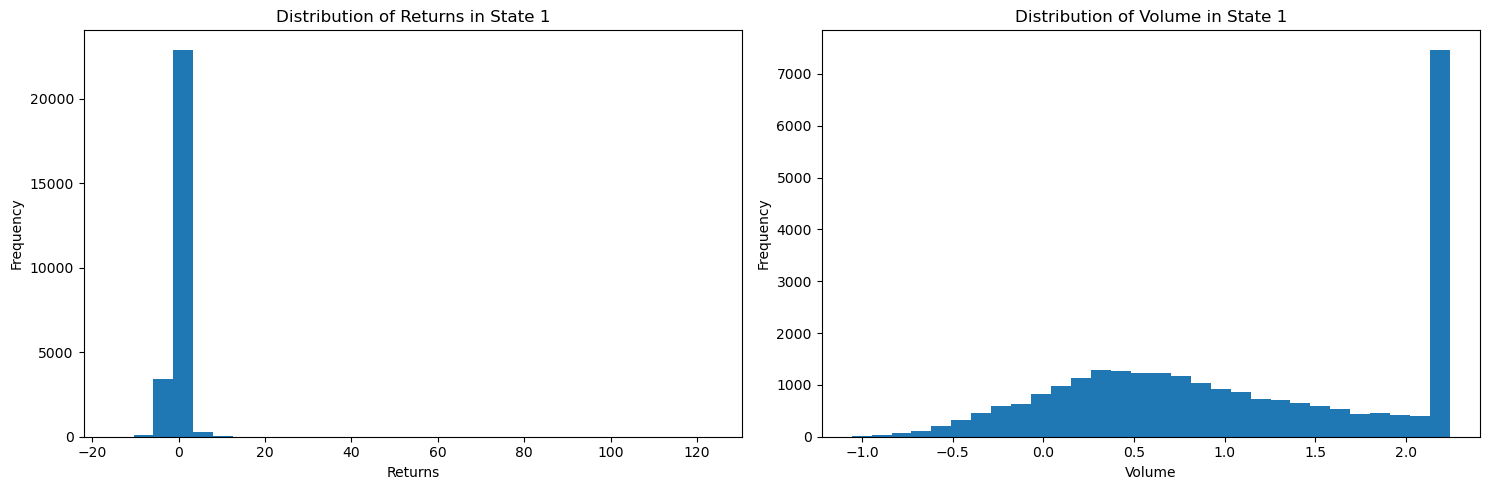

In [26]:
for state in range(model.n_components):
    state_mask = data['Hidden_State'] == state
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    plt.hist(X[state_mask, 0], bins=30)
    plt.title(f'Distribution of Returns in State {state}')
    plt.xlabel('Returns')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 2, 2)
    plt.hist(X[state_mask, 1], bins=30)
    plt.title(f'Distribution of Volume in State {state}')
    plt.xlabel('Volume')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()


D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26469 (\N{CJK UNIFIED IDEOGRAPH-6765}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 28304 (\N{CJK UNIFIED IDEOGRAPH-6E90}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36890 (\N{CJK UNIFIED IDEOGRAPH-901A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\Lib\site-packages\IPython\core\pylabtools.p

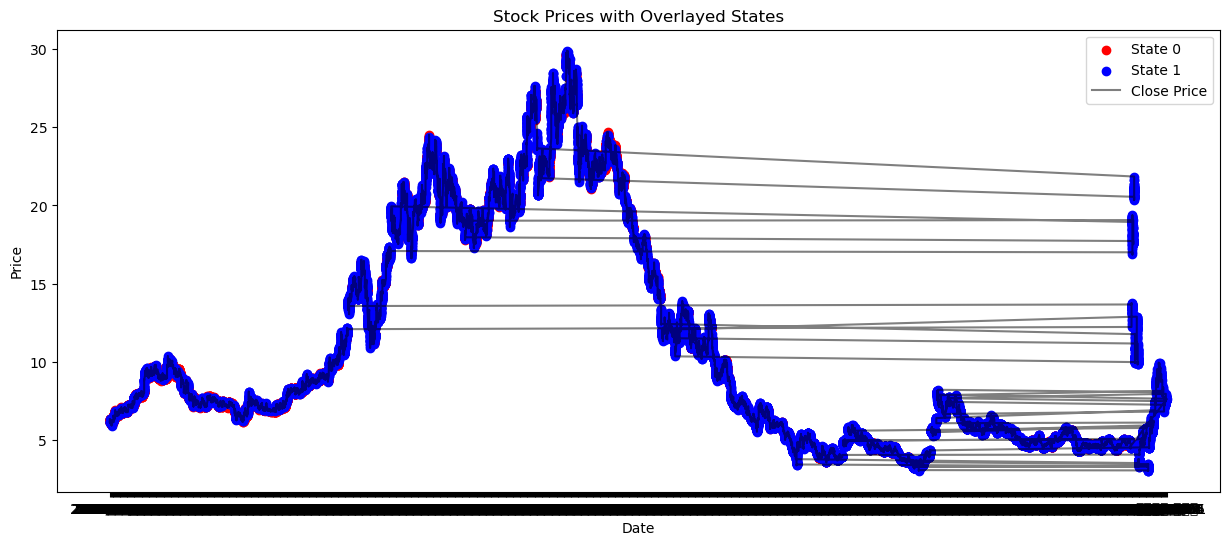

In [27]:
plt.figure(figsize=(15, 6))
colors = ['red', 'blue', 'green', 'orange', 'purple']  

for state in range(model.n_components):
    state_mask = data['Hidden_State'] == state
    plt.scatter(data.loc[state_mask, date_column], data.loc[state_mask, close_price_column], 
                color=colors[state], label=f'State {state}')

plt.plot(data[date_column], data[close_price_column], label='Close Price', color='black', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices with Overlayed States')
plt.legend()
plt.show()


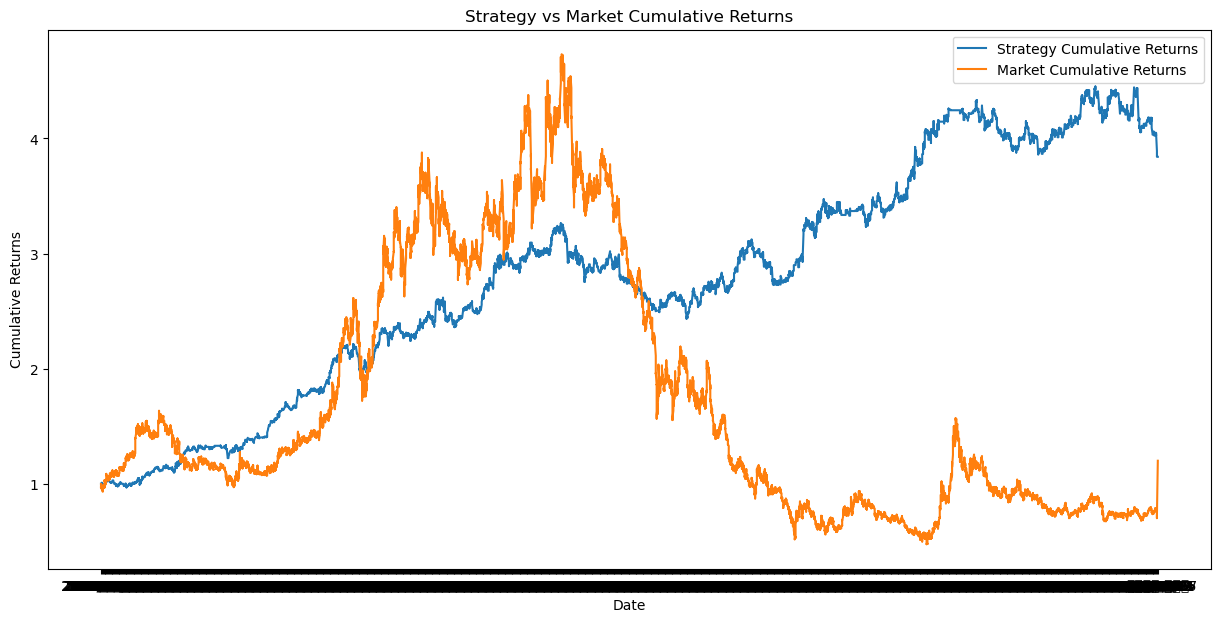

Strategy Sharpe Ratio: -0.21125765127345456
Market Sharpe Ratio: -0.07193661395230104


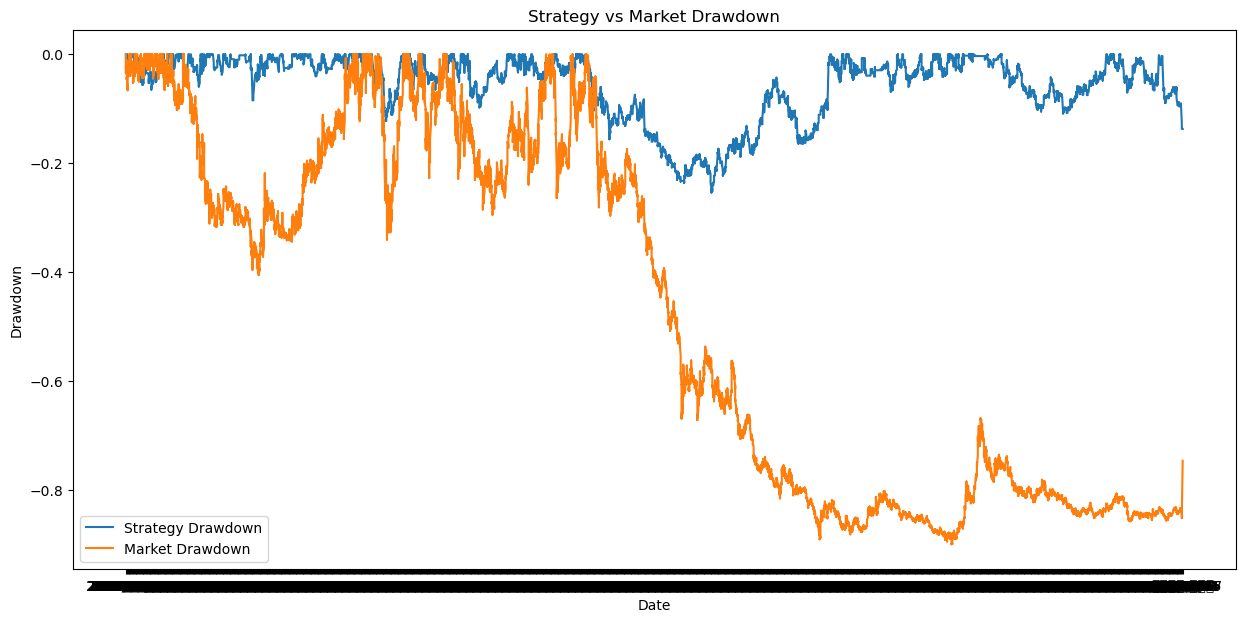

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# 获取日期和收盘价列的列名
date_column = data.columns[0]  
close_price_column = data.columns[5]  

# 计算市场每日回报率和累计回报率
data['Market_Returns'] = data[close_price_column].pct_change()
data['Market_Cumulative'] = (1 + data['Market_Returns']).cumprod()

# 设定无风险利率和年交易日数
risk_free_rate = 0.01  # 年无风险利率
trading_days = 252  # 每年的交易日数

# 计算策略和市场的标准差
strategy_std = data['Strategy'].std() * np.sqrt(trading_days)
market_std = data['Market_Returns'].std() * np.sqrt(trading_days)

# 计算夏普比率
strategy_sharpe = (data['Strategy'].mean() * trading_days - risk_free_rate) / strategy_std
market_sharpe = (data['Market_Returns'].mean() * trading_days - risk_free_rate) / market_std

# 绘制策略和市场累计回报率的对比图
plt.figure(figsize=(15, 7))
plt.plot(data[date_column], data['Cumulative_Returns'], label='Strategy Cumulative Returns')
plt.plot(data[date_column], data['Market_Cumulative'], label='Market Cumulative Returns')
plt.title('Strategy vs Market Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

# 打印夏普比率
print(f"Strategy Sharpe Ratio: {strategy_sharpe}")
print(f"Market Sharpe Ratio: {market_sharpe}")

# 定义计算回撤的函数
def drawdown(return_series):
    """计算回撤序列。"""
    wealth_index = 1000 * (1 + return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks) / previous_peaks
    return drawdowns

# 计算策略和市场的回撤
strategy_drawdown = drawdown(data['Strategy'])
market_drawdown = drawdown(data['Market_Returns'])

# 绘制策略和市场回撤的对比图
plt.figure(figsize=(15, 7))
plt.plot(data[date_column], strategy_drawdown, label='Strategy Drawdown')
plt.plot(data[date_column], market_drawdown, label='Market Drawdown')
plt.title('Strategy vs Market Drawdown')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.show()


In [4]:
data = pd.read_csv('00241.csv')

#从列名中去掉任何前导/尾随空格
data.columns = data.columns.str.strip()

data['日期'] = pd.to_datetime(data['日期'], errors='coerce')

#过滤投资周期的数据
start_date = pd.Timestamp('2020-11-17')
end_date = pd.Timestamp('2023-11-17')
investment_period_data = data[(data['日期'] >= start_date) & (data['日期'] <= end_date)]

# 在“”列中删除带有NaT的行
investment_period_data = investment_period_data.dropna(subset=['日期'])

# 计算每日收益
investment_period_data['日收益率'] = investment_period_data['收盘'].pct_change()

# 计算累计收益
investment_period_data['累计回报'] = (1 + investment_period_data['日收益率']).cumprod()

initial_investment = 1000000  #初始投资100万元
final_amount = initial_investment * investment_period_data['累计回报'].iloc[-1]

final_amount

230653.26633165227

In [23]:
import os
import pandas as pd

folder_path = 'D:\机器学习大作业\Processed_Data' 
start_date = pd.Timestamp('2020-11-17')
end_date = pd.Timestamp('2023-11-17')
total_investment = 1000000   # 总投资额
# 计算股票历史收益
def calculate_momentum(file_path, start, end):
    data = pd.read_csv(file_path)
    data.columns = data.columns.str.strip()
    data['日期'] = pd.to_datetime(data['日期'], errors='coerce')
    data = data[(data['日期'] >= start) & (data['日期'] <= end)]
    if not data.empty:
        data['SMA_50'] = data['收盘'].rolling(window=50).mean()  # 50 天简单移动平均线
        data['SMA_200'] = data['收盘'].rolling(window=200).mean()  # 200 天简单移动平均线
        last_row = data.iloc[-1]
        if last_row['SMA_50'] > last_row['SMA_200']:
            start_price = data.iloc[0]['收盘']
            end_price = last_row['收盘']
            return (end_price - start_price) / start_price
    return None

# 存储动量的列表和对应的文件
stock_momentum = []

# 迭代文件并计算动量
for file in os.listdir(folder_path):
    if file.endswith('.csv'):
        file_path = os.path.join(folder_path, file)
        momentum = calculate_momentum(file_path, start_date, end_date)
        if momentum is not None:
            stock_momentum.append((file, momentum))

#精选势头正向的股票
selected_stocks = [stock for stock in stock_momentum if stock[1] > 0]

# 计算每只选定股票的投资
num_selected_stocks = len(selected_stocks)
investment_per_stock = total_investment / num_selected_stocks

total_final_return = 0

# 计算每只选定股票的最终收益
for stock_file, _ in selected_stocks:
    file_path = os.path.join(folder_path, stock_file)
    final_return = investment_per_stock * calculate_momentum(file_path, start_date, end_date)
    total_final_return += final_return

total_final_amount = total_investment + total_final_return
print(f"最终总收益为: {total_final_amount:.2f} 元")


最终总收益为: 2547937.84 元
